# Librerías

In [733]:
import warnings


# 📌 Operaciones matemáticas y matrices eficientes
import numpy as np

# 📌 Manejo y análisis de datos tabulares
import pandas as pd
# Ignorar las advertencias de tipo DtypeWarning
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

# 📌 Crear gráficos y visualizaciones personalizadas
import matplotlib.pyplot as plt

# 📌 Gráficos estadísticos con mejor estilo
import seaborn as sns

# 📌 Escalar datos entre 0 y 1 (Normalización)
from sklearn.preprocessing import MinMaxScaler

# 📌 Estandarizar datos con media 0, varianza 1
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler

# 📌 Algoritmo de clustering no supervisado
from sklearn.cluster import KMeans

# 📌 Manejo de datos espaciales con Pandas
import geopandas as gpd

# 📌 Crear mapas interactivos con Leaflet.js
import folium

# 📌 Agregar botón de pantalla completa en mapas
from folium.plugins import Fullscreen

# 📌 Mostrar elementos interactivos en Jupyter/Colab
from IPython.display import display

# 📌 Personalizar tamaño y estructura del mapa
from branca.element import Figure


# Funciones auxiliares

In [734]:
def plot_inertia( data , i = 10):
   # 1. Write a loop to fit K-Means Clustering models with 2 to i clusters

    # create an empty list to hold many inertia values
    inertia_values = []

    # create 2 - i clusters, and add the intertia scores to the list
    for k in range(2, i):
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)

    # 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis

    # turn the list into a series for plotting
    inertia_series = pd.Series(inertia_values, index=range(2, i))

    # plot the data
    inertia_series.plot(marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Number of Clusters vs. Inertia");

In [735]:
def plot_heatmap_clusters_kmeans(  data , model_kmeans):
  # Graficar un mapa de calor para interpretar los centros de los clusters del algortimo KMEANS
  centroids_df = pd.DataFrame(model_kmeans.cluster_centers_, columns = data.columns)
  plt.figure(figsize=(10, 2))
  sns.heatmap(centroids_df , cmap='RdBu', annot=True , fmt=".2f", linewidths=.5);

In [736]:
def tabla_frecuencias_labels(labels):

  # Dado los labels del algortimo de clustering devuelve una tabla con frecuencias y % de cada cluster

  cluster_sizes = pd.Series(labels).value_counts()
  cluster_percentages = pd.Series(labels).value_counts(normalize=True) * 100

  # Crear una tabla de frecuencias y pesos porcentuales
  cluster_summary = pd.DataFrame({
      'Tamaño del Clúster': cluster_sizes,
      'Peso (%)': cluster_percentages
  })

  return cluster_summary

In [737]:
def plot_dendograma(model_df_scaled, valor_corte ):
  # Crear la matriz de enlace utilizando el método 'ward'
  linkage_matrix = linkage(model_df_scaled, method='ward')

  # Crear el dendrograma con color_threshold especificado
  color_threshold_value = valor_corte
  dendrogram_info = dendrogram(linkage_matrix, color_threshold=color_threshold_value)

  # Añadir una línea horizontal para indicar el color_threshold
  plt.axhline(y=color_threshold_value, color='b', linestyle='--')

  # Ajustar el título y las etiquetas
  plt.title("Hierarchical Clustering Dendrogram")
  plt.xlabel("Data Points")
  plt.ylabel("Euclidean Distance")
  plt.show()

In [738]:
def print_metrics(model, data):
    print(model)
    print(Counter(model.labels_))
    print("silhouette_score: " , silhouette_score(data, model.labels_))

In [739]:
import pandas as pd

def calcular_RME(df, 
                 columnas_eventos=['Crimen Organizado', 'Delitos Sexuales', 'Delitos Violentos', 'Robos y Hurtos', 'Violencia Familiar'], 
                 columna_poblacion='personas', 
                 solo_rme=True):
    """
    Calcula la Razón de Morbilidad Estandarizada (RME) para cada columna de eventos.

    Parámetros:
      - df: DataFrame que contiene los datos.
      - columnas_eventos: Lista de nombres de columnas que representan los eventos. 
                          Por defecto: ['Crimen Organizado', 'Delitos Sexuales', 'Delitos Violentos', 'Robos y Hurtos', 'Violencia Familiar'].
      - columna_poblacion: Nombre de la columna que contiene la población. Por defecto: 'personas'.
      - solo_rme: Booleano que, si es True (por defecto), retorna únicamente las columnas que comienzan con "RME_". 
                  Si es False, retorna el DataFrame completo con las columnas adicionales.
    
    Proceso:
      1. Calcula la tasa global para cada evento (total del evento en todas las comunas / población total).
      2. Calcula los casos esperados en cada comuna (población de la comuna * tasa global).
      3. Calcula la RME: Observados / Esperados.
    """
    # Calcular la población total (una sola vez)
    total_population = df[columna_poblacion].sum()
    
    # Iterar sobre cada columna de evento para calcular la RME
    for col in columnas_eventos:
        # a) Calcular la tasa global para el evento
        total_event = df[col].sum()  # Total del evento en todas las comunas
        global_rate = total_event / total_population  # Casos por persona en el conjunto
        
        # b) Calcular los casos esperados en cada comuna para el evento
        df[f'expected_{col}'] = df[columna_poblacion] * global_rate
        
        # c) Calcular la RME: Observados / Esperados
        df[f'RME_{col}'] = df[col] / df[f'expected_{col}']
    
    # Retornar solo las columnas RME si solo_rme es True
    if solo_rme:
        rme_cols = [col for col in df.columns if col.startswith('RME_')]
        return df[rme_cols]
    
    # Si solo_rme es False, retornar el DataFrame completo
    return df


---


# **Cargar datos**

**Datos de crimenes**

In [740]:
# DEFINO EL TIPO DE DATO ASI STE MAL APRA ACELEAR LA CARGA DEL DATAFRAME

In [741]:
# Definir los tipos de datos para las columnas
dtype = {
    'descripcion_conducta': 'object',
    'armas_medios': 'object',
    'barrios_hecho': 'object',
    'fecha_hecho': 'object',
    'hora_hecho': 'object',
    'edad': 'int64' ,
    'sexo': 'object',
    'movil_victima': 'object',
    'movil_agresor': 'object',
    'clase_sitio': 'object',
    'articulo': 'object',
    'delito_solo': 'object',
    'curso_vida': 'object',
    'curso_vida_orden': 'int64',
    'year_num': 'int64',
    'mes_num': 'int64',
    'dia_num': 'int64',
    'rango_horario': 'object',
    'tipologia': 'object',
    'rango_horario_orden': 'int64',
    'dia_nombre': 'object',
    'dia_nombre_orden': 'int64',
    'localidad': 'object',
    'num_com': 'int64',
    'nom_com': 'object',
    'cantidad_unica': 'int64'
}

In [742]:
# Read data from URL
url = "https://raw.githubusercontent.com/jcamilobm/streamlit_cluster_crimes/refs/heads/main/data/raw/delitos_bucaramanga_2016_2023.csv"
df = pd.read_csv(url , dtype = dtype)

# Convertir los nombres de las columnas a minúsculas
df = df.rename(columns=str.lower)
# por si la letra ñ despues genera problemas:
df = df.rename(columns={ 'año_num': 'year_num',
                         'tipología':'tipologia'})

df.head(2)

,descripcion_conducta,armas_medios,barrios_hecho,fecha_hecho,hora_hecho,edad,sexo,movil_victima,movil_agresor,clase_sitio,...,dia_num,rango_horario,tipologia,rango_horario_orden,dia_nombre,dia_nombre_orden,localidad,num_com,nom_com,cantidad_unica
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,20:30:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,17,20:00-20:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,20,lunes,1,11. SUR,11,SUR,1
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,GRANJAS DE PROVENZA,2019-09-12,01:30:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,1:00-1:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,1,jueves,4,10. PROVENZA,10,PROVENZA,1


In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   descripcion_conducta  100993 non-null  object
 1   armas_medios          100993 non-null  object
 2   barrios_hecho         100993 non-null  object
 3   fecha_hecho           100993 non-null  object
 4   hora_hecho            100993 non-null  object
 5   edad                  100360 non-null  object
 6   sexo                  100993 non-null  object
 7   movil_victima         100993 non-null  object
 8   movil_agresor         100993 non-null  object
 9   clase_sitio           100993 non-null  object
 10  articulo              100993 non-null  object
 11  delito_solo           100993 non-null  object
 12  curso_vida            100993 non-null  object
 13  curso_vida_orden      100993 non-null  int64 
 14  year_num              100993 non-null  int64 
 15  mes_num          

In [744]:
df.shape

(100993, 26)

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   descripcion_conducta  100993 non-null  object
 1   armas_medios          100993 non-null  object
 2   barrios_hecho         100993 non-null  object
 3   fecha_hecho           100993 non-null  object
 4   hora_hecho            100993 non-null  object
 5   edad                  100360 non-null  object
 6   sexo                  100993 non-null  object
 7   movil_victima         100993 non-null  object
 8   movil_agresor         100993 non-null  object
 9   clase_sitio           100993 non-null  object
 10  articulo              100993 non-null  object
 11  delito_solo           100993 non-null  object
 12  curso_vida            100993 non-null  object
 13  curso_vida_orden      100993 non-null  int64 
 14  year_num              100993 non-null  int64 
 15  mes_num          

**Datos mapa Bucaramanga por comunas**

In [746]:
url_2 = "https://raw.githubusercontent.com/jcamilobm/streamlit_cluster_crimes/refs/heads/main/data/raw/comunas_bucaramanga.geojson"

# Read data from URL
# Cargar el archivo GeoJSON
gdf = gpd.read_file(url_2)

In [747]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   area                          17 non-null     float64 
 1   organicos__kg_semana_         17 non-null     float64 
 2   personas_s                    17 non-null     int32   
 3   nombre_cod                    17 non-null     object  
 4   habitantes                    17 non-null     int32   
 5   aprovechables__kg_semana_     17 non-null     float64 
 6   no_aprovechables__kg_semana_  17 non-null     float64 
 7   rcd__kg_semana_               17 non-null     float64 
 8   generacion__kg_semana_        17 non-null     float64 
 9   nombre_com                    17 non-null     object  
 10  posconsumo__kg_semana_        17 non-null     float64 
 11  objectid_1                    17 non-null     int32   
 12  cod_munici                    17 non-null   

In [748]:
gdf.head(2)

,area,organicos__kg_semana_,personas_s,nombre_cod,habitantes,aprovechables__kg_semana_,no_aprovechables__kg_semana_,rcd__kg_semana_,generacion__kg_semana_,nombre_com,posconsumo__kg_semana_,objectid_1,cod_munici,ppc__kg_hab_d_a_,shape_leng,perimeter,cod_comuna,cod_depart,objectid,geometry
0,4326768.342,135.415,66710,Comuna 1,54,50.417,52.019,0.6,245.536,Comuna Norte,0.045,1,001,0.649566,17379.411648,17395.825,1,68,1,"MULTIPOLYGON (((-73.14179 7.1784, -73.14148 7...."
1,1371355.042,58.016,27515,Comuna 2,35,25.633,32.164,0.0,107.624,Comuna Nororiental,0.225,2,001,0.439282,8368.026972,8375.934,2,68,2,"POLYGON ((-73.12877 7.1553, -73.12886 7.15535,..."


------

In [749]:
url_3 = "https://raw.githubusercontent.com/jcamilobm/streamlit_cluster_crimes/refs/heads/main/data/raw/proyeccion_poblacion_Bucaramanga_2021_comunas.csv"

# Read data from URL
# Cargar el archivo GeoJSON
df_poblacion = pd.read_csv(url_3)

In [750]:
df_poblacion.head(2)

,ORDEN,AÑO,Barrio_poligono,categoria,Comunas_poligonos,manzanas,personas,hombres,mujeres,Edad de 0 a 9,Edad de 10 a 19,Edad de 20 a 29,Edad de 30 a 39,Edad de 40 a 49,Edad de 50 a 59,Edad de 60 a 69,Edad de 70 a 79,Edad de 80 a 89
0,1,2021,13 DE JUNIO,BARRIO,02. NORORIENTAL,5,410,200,209,65,51,78,62,60,47,34,8,4
1,2,2021,ALTOS DEL KENNEDY,BARRIO,01. NORTE,6,529,249,279,76,85,106,71,60,71,34,19,4


In [751]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORDEN              263 non-null    int64 
 1   AÑO                263 non-null    int64 
 2   Barrio_poligono    263 non-null    object
 3   categoria          263 non-null    object
 4   Comunas_poligonos  263 non-null    object
 5   manzanas           263 non-null    int64 
 6   personas           263 non-null    object
 7   hombres            263 non-null    object
 8   mujeres            263 non-null    object
 9   Edad de 0 a 9      263 non-null    object
 10  Edad de 10 a 19    263 non-null    object
 11  Edad de 20 a 29    263 non-null    object
 12  Edad de 30 a 39    263 non-null    object
 13  Edad de 40 a 49    263 non-null    object
 14  Edad de 50 a 59    263 non-null    object
 15  Edad de 60 a 69    263 non-null    object
 16  Edad de 70 a 79    263 non-null    object
 1

# **Limpieza de datos**

Se  manipula y transforma los datos para generar resultados precisos y confiables al dejarlos en un fromato adecuado.

* Corregir tipos de datos
* Imputar datos faltantes
* Tratar inconsistencias
* Reformatear datos

### **Corregir tipos de datos**

In [752]:
# convertir fecha(datetime64[ns]) y edad(float)

df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'])

In [753]:
# Convertir la columna 'hora_hecho' a tipo datetime
df['hora_hecho'] = pd.to_datetime(df['hora_hecho'], format='%H:%M:%S').dt.time

In [754]:
df['hora_hecho'].head(2)

0    20:30:00
1    01:30:00
Name: hora_hecho, dtype: object

In [755]:
df['edad']  = pd.to_numeric( df['edad'] , errors ='coerce')

In [756]:
# Es necesario convertir las partes de fecha a un numero para que en las graficas se tome el orden correcto.
# como los años no tienen valores nulos se puede utilizar astype(int) en vez de pd.to_numeric
df['year_num']  = df['year_num'].astype(int)


# otras conversiones a numero:
df['mes_num']  = df['mes_num'].astype(int)

df['dia_num']  = df['dia_num'].astype(int)

df['num_com']  = df['num_com'].astype(int)

In [757]:
# convertir a a entero el id  del geojson para no tener problemas en el JOIN despues.

#### **Tipos de datos geojson**

In [758]:
gdf['cod_comuna']  = gdf['cod_comuna'].astype(int)

#### **Tipos de df poblacion**

In [759]:
# Se quita primero comas de los numeros
# Lista de columnas a modificar
# Seleccionar columnas desde la posición 5 (índice 4) hasta el final
columnas_a_modificar = df_poblacion.columns[6:] # desde personas

# Reemplazar comas por nada y convertir a numero
for col in columnas_a_modificar:
    df_poblacion[col] = df_poblacion[col].str.replace(',', '', regex=True)
    df_poblacion[col] = pd.to_numeric(df_poblacion[col] , errors="coerce")

In [760]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORDEN              263 non-null    int64 
 1   AÑO                263 non-null    int64 
 2   Barrio_poligono    263 non-null    object
 3   categoria          263 non-null    object
 4   Comunas_poligonos  263 non-null    object
 5   manzanas           263 non-null    int64 
 6   personas           263 non-null    int64 
 7   hombres            263 non-null    int64 
 8   mujeres            263 non-null    int64 
 9   Edad de 0 a 9      263 non-null    int64 
 10  Edad de 10 a 19    263 non-null    int64 
 11  Edad de 20 a 29    263 non-null    int64 
 12  Edad de 30 a 39    263 non-null    int64 
 13  Edad de 40 a 49    263 non-null    int64 
 14  Edad de 50 a 59    263 non-null    int64 
 15  Edad de 60 a 69    263 non-null    int64 
 16  Edad de 70 a 79    263 non-null    int64 
 1

###  **Problemas  de datos**

*   Valores faltantes
*   Duplicados
*   Valores atipicos
*   Cadenas inconsistentes



#### **Valores faltantes**


In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   descripcion_conducta  100993 non-null  object        
 1   armas_medios          100993 non-null  object        
 2   barrios_hecho         100993 non-null  object        
 3   fecha_hecho           100993 non-null  datetime64[ns]
 4   hora_hecho            100993 non-null  object        
 5   edad                  91524 non-null   float64       
 6   sexo                  100993 non-null  object        
 7   movil_victima         100993 non-null  object        
 8   movil_agresor         100993 non-null  object        
 9   clase_sitio           100993 non-null  object        
 10  articulo              100993 non-null  object        
 11  delito_solo           100993 non-null  object        
 12  curso_vida            100993 non-null  object        
 13 

In [762]:
# imputar la edad con la mediana ya que es mas robusta a valores atipicos que la media.
df['edad'] = df['edad'].fillna( df['edad'].median() )

In [763]:
# Comprobar valores faltantes
df[df.isna().any(axis=1)]

,descripcion_conducta,armas_medios,barrios_hecho,fecha_hecho,hora_hecho,edad,sexo,movil_victima,movil_agresor,clase_sitio,...,dia_num,rango_horario,tipologia,rango_horario_orden,dia_nombre,dia_nombre_orden,localidad,num_com,nom_com,cantidad_unica
84548,ARTÍCULO 243. HURTO ABIGEATO,SIN EMPLEO DE ARMAS,CUCHILLA ALTA,2022-04-08,13:51:00,35.0,FEMENINO,A PIE,A PIE,FINCAS Y SIMILARES,...,8,13:00-13:59,NaN,13,viernes,5,CORREGIMIENTO 2,19,CORREGIMIENTO 2,1


In [764]:
# Como no se consideran datos de corregimientos y es una  sola fila solo se elimina.
df.dropna(inplace=True)

In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100992 entries, 0 to 100992
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   descripcion_conducta  100992 non-null  object        
 1   armas_medios          100992 non-null  object        
 2   barrios_hecho         100992 non-null  object        
 3   fecha_hecho           100992 non-null  datetime64[ns]
 4   hora_hecho            100992 non-null  object        
 5   edad                  100992 non-null  float64       
 6   sexo                  100992 non-null  object        
 7   movil_victima         100992 non-null  object        
 8   movil_agresor         100992 non-null  object        
 9   clase_sitio           100992 non-null  object        
 10  articulo              100992 non-null  object        
 11  delito_solo           100992 non-null  object        
 12  curso_vida            100992 non-null  object        
 13  curs

In [766]:
# Se imputaron los datos faltantes de la edad con la mediana y
# se elimino un registro sin la tipologia del crimen.

#### **Inconsistencias en texto**

In [767]:
# ---------------------------------------------------
# 'armas_medios': No se considerara para el filtro de  la app en Streamlit.
df['armas_medios'].value_counts()

armas_medios
SIN EMPLEO DE ARMAS                   46958
ARMA BLANCA / CORTOPUNZANTE           20905
CONTUNDENTES                          19160
ARMA DE FUEGO                          7485
LLAVE MAESTRA                          1850
PALANCAS                               1449
VEHICULO                               1149
MOTO                                    655
ESCOPOLAMINA                            500
NO DISPONIBLE                           255
LLAMADA TELEFONICA                      248
REDES SOCIALES                           86
DIRECTA                                  63
PERRO                                    49
ARMA TRAUMATICA                          42
NO REPORTADO                             17
ARTEFACTO INCENDIARIO                    13
ACIDO                                    13
MEDICAMENTOS                             12
CARTA EXTORSIVA                          12
MIXTA                                    10
AGUA CALIENTE                            10
ARTEFACTO EXPLOSIVO

Son muchas columnas de armas_medios, en otra seccion se creara una nueva columna que las agrupe ya que se utiliza como filtro en la App de streamlit.

In [768]:
# ---------------------------------------------------
# descripcion_conducta:  No se considerara para el filtro de  la app en Streamlit.
df['descripcion_conducta'].value_counts()

descripcion_conducta
ARTÍCULO 239. HURTO PERSONAS                                                                                           45944
ARTÍCULO 111. LESIONES PERSONALES                                                                                      14665
ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR                                                                                  13898
ARTÍCULO 239. HURTO ENTIDADES COMERCIALES                                                                               7792
ARTÍCULO 347. AMENAZAS                                                                                                  4209
ARTÍCULO 239. HURTO MOTOCICLETAS                                                                                        3859
ARTÍCULO 239. HURTO RESIDENCIAS                                                                                         3743
ARTÍCULO 120. LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )                                            

In [769]:
# Zonas que no se consideraran:
categorias_a_eliminar = [
    'NO DISPONIBLE',
    'CORREGIMIENTO 1',
    'CORREGIMIENTO 2',
    'CORREGIMIENTO 3'
]

# Eliminar filas con esas categorías
df = df[~df['localidad'].isin(categorias_a_eliminar)]

In [770]:
 df.localidad.value_counts()

localidad
13. ORIENTAL              11898
03. SAN FRANCISCO         11678
15. CENTRO                10800
12. CABECERA DEL LLANO    10094
01. NORTE                  9316
06. LA CONCORDIA           6830
04. OCCIDENTAL             6669
05. GARCIA ROVIRA          5429
10. PROVENZA               5136
02. NORORIENTAL            4081
11. SUR                    3240
17. MUTIS                  2748
07. LA CIUDADELA           2485
16. LAGOS DEL CACIQUE      2410
14. MORRORICO              2407
08. SUROCCIDENTE           1944
09. LA PEDREGOSA           1928
Name: count, dtype: int64

In [771]:
 # Aunque hay 9k valores de genero desconicido, se conservan ya que la avriable central es  la zona y los tipos de crimenes.
 # Las otras variables seran filtros en una aplicacion web.
df.sexo.value_counts()

sexo
FEMENINO         45880
MASCULINO        44190
NO DISPONIBLE     9023
Name: count, dtype: int64

In [772]:
 # Para variables categoricas con muchas  categorias, se  debe  organizar
df.clase_sitio.value_counts().head(30)

clase_sitio
VIAS PUBLICAS                         48173
CASAS DE HABITACION                   14194
ALMACENES                              3252
FRENTE A RESIDENCIAS - VIA PUBLICA     2208
CARRETERA                              1919
APARTAMENTO                            1913
LOCAL COMERCIAL                        1889
CALLEJÓN                                892
INTERIOR VEHICULO SERVICIO PUBLICO      868
PARQUES                                 858
CENTRO COMERCIAL                        858
PARQUEADERO                             822
ESTABLECIMIENTO DE COMERCIO             742
EDIFICIO                                661
OFICINAS                                653
EMPRESA                                 629
INTERIOR VEHICULO PARTICULAR            621
DENTRO DE LA VIVIENDA                   610
TIENDA                                  549
RESTAURANTES                            535
CARCELES                                528
BUS METROLINEA                          503
SUPERMERCADOS       

In [773]:
 # movil del crimen
df['movil_victima'].value_counts()

movil_victima
A PIE                    85748
CONDUCTOR MOTOCICLETA     4823
CONDUCTOR VEHICULO        3323
PASAJERO BUS              1953
PASAJERO MOTOCICLETA       728
CONDUCTOR TAXI             594
BICICLETA                  560
PASAJERO TAXI              531
PASAJERO VEHICULO          493
CONDUCTOR BUS              204
PASAJERO METRO             120
NO DISPONIBLE               12
PASAJERO AERONAVE            3
PASAJERO BARCO               1
Name: count, dtype: int64

In [774]:
categoria_dict = {
    "A PIE": "A pie",
    "CONDUCTOR MOTOCICLETA": "Motocicleta",
    "PASAJERO MOTOCICLETA": "Motocicleta",
    "CONDUCTOR VEHICULO": "Vehículo Privado",
    "PASAJERO VEHICULO": "Vehículo Privado",
    "CONDUCTOR TAXI": "Taxi",
    "PASAJERO TAXI": "Taxi",
    "CONDUCTOR BUS": "Bus",
    "PASAJERO BUS": "Bus",
    "PASAJERO METRO": "Metro",
    "BICICLETA": "Bicicleta",
    "PASAJERO AERONAVE": "Transporte Aéreo",
    "PASAJERO BARCO": "Transporte Marítimo",
    "NO DISPONIBLE": "No Disponible"
}

df['movil_victima'] = df['movil_victima'].map(categoria_dict)

In [775]:
df['movil_victima'].value_counts()

movil_victima
A pie                  85748
Motocicleta             5551
Vehículo Privado        3816
Bus                     2157
Taxi                    1125
Bicicleta                560
Metro                    120
No Disponible             12
Transporte Aéreo           3
Transporte Marítimo        1
Name: count, dtype: int64

In [776]:
# movil agresor
df['movil_agresor'].value_counts()

movil_agresor
A PIE                    75914
CONDUCTOR MOTOCICLETA     9572
PASAJERO MOTOCICLETA      8561
CONDUCTOR VEHICULO        1739
PASAJERO BUS              1677
CONDUCTOR TAXI             515
PASAJERO TAXI              452
BICICLETA                  267
PASAJERO VEHICULO          263
PASAJERO METRO              96
CONDUCTOR BUS               29
NO DISPONIBLE                5
PASAJERO BARCO               1
PASAJERO AERONAVE            1
TRIPULANTE AERONAVE          1
Name: count, dtype: int64

In [777]:
categoria_dict = {
    "A PIE": "A pie",
    "CONDUCTOR MOTOCICLETA": "Motocicleta",
    "PASAJERO MOTOCICLETA": "Motocicleta",
    "CONDUCTOR VEHICULO": "Vehículo Privado",
    "PASAJERO VEHICULO": "Vehículo Privado",
    "CONDUCTOR TAXI": "Taxi",
    "PASAJERO TAXI": "Taxi",
    "CONDUCTOR BUS": "Bus",
    "PASAJERO BUS": "Bus",
    "PASAJERO METRO": "Metro",
    "BICICLETA": "Bicicleta",
    "PASAJERO AERONAVE": "Transporte Aéreo",
    "PASAJERO BARCO": "Transporte Marítimo",
    "NO DISPONIBLE": "No Disponible"
}

df['movil_agresor'] = df['movil_agresor'].map(categoria_dict)

In [778]:
df['movil_agresor'].value_counts()

movil_agresor
A pie                  75914
Motocicleta            18133
Vehículo Privado        2002
Bus                     1706
Taxi                     967
Bicicleta                267
Metro                     96
No Disponible              5
Transporte Marítimo        1
Transporte Aéreo           1
Name: count, dtype: int64

In [779]:
#------------------------------------------------------------------------------------------
# articulo
df['articulo'].value_counts()

articulo
ARTÍCULO 239      60783
ARTÍCULO 111      14377
ARTÍCULO 229      13430
ARTÍCULO 347       3922
ARTÍCULO 120       1687
ARTÍCULO 209       1358
ARTÍCULO 103        815
ARTÍCULO 208        587
ARTÍCULO 244        497
ARTÍCULO 205        383
ARTÍCULO 206        243
ARTÍCULO 210        212
ARTÍCULO 109        188
ARTÍCULO 210 A      183
ARTÍCULO 218        108
ARTÍCULO 219 A       94
ARTÍCULO 207         86
ARTÍCULO 213         40
ARTÍCULO 104A        26
ARTÍCULO 211         22
ARTÍCULO 217 A       21
ARTÍCULO 217          9
ARTÍCULO 213 A        6
ARTÍCULO 214          5
ARTÍCULO 343          4
ARTÍCULO 125          3
ARTÍCULO 265          1
ARTÍCULO 429          1
ARTÍCULO 350          1
ARTÍCULO 243          1
Name: count, dtype: int64

In [780]:
# esta  columna no tiene utilidad para el analisis, despues se borra.

In [781]:
#------------------------------------------------------------------------------------------
#  tipologia

df.tipologia.value_counts()

tipologia
DELITOS CONTRA EL PATRIMONIO ECONOMICO                         61282
DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL                17097
DELITOS CONTRA LA FAMILIA                                      13430
DELITOS CONTRA LA SEGURIDAD PUBLICA                             3927
DELITOS CONTRA LA LIBERTAD, INTEGRIDAD Y FORMACION SEXUALES     3357
Name: count, dtype: int64

In [782]:
# Agrupar por 'Categoria' y 'Subcategoria' y calcular la suma de 'Valor'
#resultado = df.groupby(['tipologia', 'delito_solo']).reset_index(name='Recuento')

conteo = df.groupby(['tipologia', 'delito_solo']).size().reset_index(name='Recuento')
conteo

,tipologia,delito_solo,Recuento
0,DELITOS CONTRA EL PATRIMONIO ECONOMICO,ABIGEATO,1
1,DELITOS CONTRA EL PATRIMONIO ECONOMICO,DAÑO EN BIEN AJENO,1
2,DELITOS CONTRA EL PATRIMONIO ECONOMICO,EXTORSIÓN,497
3,DELITOS CONTRA EL PATRIMONIO ECONOMICO,HURTO AUTOMOTORES,138
4,DELITOS CONTRA EL PATRIMONIO ECONOMICO,HURTO ENTIDADES COMERCIALES,7742
5,DELITOS CONTRA EL PATRIMONIO ECONOMICO,HURTO MOTOCICLETAS,3786
6,DELITOS CONTRA EL PATRIMONIO ECONOMICO,HURTO PERSONAS,45496
7,DELITOS CONTRA EL PATRIMONIO ECONOMICO,HURTO RESIDENCIAS,3621
8,DELITOS CONTRA LA FAMILIA,VIOLENCIA INTRAFAMILIAR,13430
9,"DELITOS CONTRA LA LIBERTAD, INTEGRIDAD Y FORMA...",ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS,587


In [783]:
#------------------------------------------------------------------------------------------
# delito_solo
df['delito_solo'].value_counts()

delito_solo
HURTO PERSONAS                                                                                     45496
LESIONES PERSONALES                                                                                14377
VIOLENCIA INTRAFAMILIAR                                                                            13430
HURTO ENTIDADES COMERCIALES                                                                         7742
AMENAZAS                                                                                            3922
HURTO MOTOCICLETAS                                                                                  3786
HURTO RESIDENCIAS                                                                                   3621
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )                                                      1637
ACTOS SEXUALES CON MENOR DE 14 AÑOS                                                                 1358
HOMICIDIO                                  

In [784]:
df['delito_solo'].unique()

array(['HURTO PERSONAS', 'HURTO RESIDENCIAS', 'HURTO MOTOCICLETAS',
       'HURTO AUTOMOTORES', 'HURTO ENTIDADES COMERCIALES',
       'ACTOS SEXUALES CON MENOR DE 14 AÑOS',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
       'VIOLENCIA INTRAFAMILIAR', 'LESIONES CULPOSAS',
       'ACTO SEXUAL VIOLENTO',
       'UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PARA OFRECER SERVICIOS SEXUALES DE MENORES',
       'ACCESO CARNAL VIOLENTO',
       'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR  (CIRCUNSTANC',
       'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR',
       'INDUCCIÓN A LA PROSTITUCIÓN', 'ACOSO SEXUAL',
       'DEMANDA DE EXPLOTACION SEXUAL COMERCIAL DE PERSONA MENOR DE 18 AÑOS DE EDAD',
       'ESTÍMULO A LA PROSTITUCIÓN DE MENORES',
       'CONSTREÑIMIENTO A LA PROSTITUCIÓN',
       'ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS DE AGRAVACIÓN)',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNST

In [785]:
#------------------------------------------------------------------------------------------
# curso_vida
df['curso_vida'].value_counts()

curso_vida
25-29            14214
20-24            13611
30-34            12469
35-39            10123
NO DISPONIBLE     9171
40-44             8405
15-19             6426
45-49             6386
50-54             5060
55-59             3678
60-64             2409
10-14             2255
65-69             1489
5-9               1007
70-74              893
0-4                554
75-79              509
80-84              260
85 o más           174
Name: count, dtype: int64

In [786]:
# Hay muchas categorias de rango de edad, se reduce el numero de grupos

In [787]:
# Diccionario para mapear edades a los grupos personalizados
# Fuente: https://www.minsalud.gov.co/proteccionsocial/Paginas/ciclovida.aspx
mapa_edades = {
    '0-4': 'Primera Infancia (0-5 años)',
    '5-9': 'Primera Infancia (0-5 años)',
    '10-14': 'Infancia (6-11 años)',
    '15-19': 'Adolescencia (12-18 años)',
    '20-24': 'Juventud (14-26 años)',
    '25-29': 'Juventud (14-26 años)',
    '30-34': 'Adultez (27-59 años)',
    '35-39': 'Adultez (27-59 años)',
    '40-44': 'Adultez (27-59 años)',
    '45-49': 'Adultez (27-59 años)',
    '50-54': 'Adultez (27-59 años)',
    '55-59': 'Adultez (27-59 años)',
    '60-64': 'Persona Mayor (60 años o más)',
    '65-69': 'Persona Mayor (60 años o más)',
    '70-74': 'Persona Mayor (60 años o más)',
    '75-79': 'Persona Mayor (60 años o más)',
    '80-84': 'Persona Mayor (60 años o más)',
    '85 o más': 'Persona Mayor (60 años o más)',
    'NO DISPONIBLE': 'No disponible'
}

In [788]:
df['curso_vida'] = df['curso_vida'].map(mapa_edades)

In [789]:
# curso_vida
df['curso_vida'].value_counts()

curso_vida
Adultez (27-59 años)             46121
Juventud (14-26 años)            27825
No disponible                     9171
Adolescencia (12-18 años)         6426
Persona Mayor (60 años o más)     5734
Infancia (6-11 años)              2255
Primera Infancia (0-5 años)       1561
Name: count, dtype: int64

In [790]:
#------------------------------------------------------------------------------------------
# curso_vida

# Definir el orden de las categorías
orden_categorico = [
    'Primera Infancia (0-5 años)',
    'Infancia (6-11 años)',
    'Adolescencia (12-18 años)',
    'Juventud (14-26 años)',
    'Adultez (27-59 años)',
    'Persona Mayor (60 años o más)',
    'No disponible'
]


# Convertir la columna en categórica con orden
df['curso_vida'] = pd.Categorical(df['curso_vida'], categories=orden_categorico, ordered=True)

# Crear la columna de orden numérico
df['curso_vida_orden'] = df['curso_vida'].cat.codes

In [791]:
df['curso_vida_orden']

0         3
1         3
2         3
3         3
4         3
         ..
100985    4
100987    3
100988    3
100990    4
100991    4
Name: curso_vida_orden, Length: 99093, dtype: int8

In [792]:
df[['curso_vida','curso_vida_orden']].head()

,curso_vida,curso_vida_orden
0,Juventud (14-26 años),3
1,Juventud (14-26 años),3
2,Juventud (14-26 años),3
3,Juventud (14-26 años),3
4,Juventud (14-26 años),3


In [793]:
#------------------------------------------------------------------------------------------
# year_num.value_counts()

df = df.rename(columns={'year_num': 'year'})

df.year.value_counts()

year
2022    15482
2021    14769
2019    12746
2018    12347
2023    12046
2017    10847
2016    10652
2020    10204
Name: count, dtype: int64

In [794]:
#------------------------------------------------------------------------------------------
#  mes_num

df.mes_num.value_counts()

mes_num
9     8976
8     8651
10    8616
7     8563
1     8459
2     8405
3     8399
5     8337
6     8085
4     7694
12    7497
11    7411
Name: count, dtype: int64

In [795]:
#------------------------------------------------------------------------------------------
#  dia_num

df.dia_num.value_counts()

dia_num
1     3682
10    3409
15    3375
23    3345
18    3344
9     3333
3     3331
14    3297
5     3295
28    3278
2     3278
20    3272
22    3260
24    3258
4     3238
8     3238
19    3234
27    3221
17    3203
13    3191
6     3186
26    3183
25    3176
21    3155
16    3146
7     3136
11    3122
12    3116
30    3050
29    2813
31    1928
Name: count, dtype: int64

In [796]:
#------------------------------------------------------------------------------------------
#  rango_horario
df.rango_horario.value_counts()

rango_horario
10:00-10:59    7187
11:00-11:59    6052
19:00-19:59    5839
20:00-20:59    5512
8:00-8:59      5509
18:00-18:59    5429
9:00-9:59      5296
16:00-16:59    5005
15:00-15:59    4910
17:00-17:59    4905
14:00-14:59    4525
12:00-12:59    4340
21:00-21:59    4055
13:00-13:59    4015
7:00-7:59      3585
0:00-0:59      3439
22:00-22:59    3243
6:00-6:59      2669
23:00-23:59    2537
1:00-1:59      2464
2:00-2:59      2461
3:00-3:59      2312
5:00-5:59      1931
4:00-4:59      1873
Name: count, dtype: int64

In [797]:
#------------------------------------------------------------------------------------------
#  dia_nombre
df.dia_nombre.value_counts()

dia_nombre
sábado       15478
viernes      14878
martes       14223
miércoles    14171
lunes        13928
jueves       13777
domingo      12638
Name: count, dtype: int64

In [798]:
#------------------------------------------------------------------------------------------
#  tipologia

df.localidad.value_counts()

localidad
13. ORIENTAL              11898
03. SAN FRANCISCO         11678
15. CENTRO                10800
12. CABECERA DEL LLANO    10094
01. NORTE                  9316
06. LA CONCORDIA           6830
04. OCCIDENTAL             6669
05. GARCIA ROVIRA          5429
10. PROVENZA               5136
02. NORORIENTAL            4081
11. SUR                    3240
17. MUTIS                  2748
07. LA CIUDADELA           2485
16. LAGOS DEL CACIQUE      2410
14. MORRORICO              2407
08. SUROCCIDENTE           1944
09. LA PEDREGOSA           1928
Name: count, dtype: int64

In [799]:
#------------------------------------------------------------------------------------------
#  num_com

df.num_com.value_counts()

num_com
13    11898
3     11678
15    10800
12    10094
1      9316
6      6830
4      6669
5      5429
10     5136
2      4081
11     3240
17     2748
7      2485
16     2410
14     2407
8      1944
9      1928
Name: count, dtype: int64

In [800]:
#------------------------------------------------------------------------------------------
#  nom_com

df.nom_com.value_counts()

nom_com
ORIENTAL              11898
SAN FRANCISCO         11678
CENTRO                10800
CABECERA DEL LLANO    10094
NORTE                  9316
LA CONCORDIA           6830
OCCIDENTAL             6669
GARCIA ROVIRA          5429
PROVENZA               5136
NORORIENTAL            4081
SUR                    3240
MUTIS                  2748
LA CIUDADELA           2485
LAGOS DEL CACIQUE      2410
MORRORICO              2407
SUROCCIDENTE           1944
LA PEDREGOSA           1928
Name: count, dtype: int64

In [801]:
#------------------------------------------------------------------------------------------
#  cantidad_unica
df.cantidad_unica.value_counts()

cantidad_unica
1    99093
Name: count, dtype: int64

#### **Filas duplicadas**

In [802]:
print( "Cantidad de duplicados: " , df.duplicated().sum() )

Cantidad de duplicados:  29


In [803]:
df.drop_duplicates(inplace=True)

In [804]:
print( "Cantidad de duplicados: " , df.duplicated().sum() )

Cantidad de duplicados:  0


#### **Valores atípicos numéricos**

Es importante eliminar valores atipicos para clusters por:

- **Reduce ruido:** Datos poco frecuentes pueden distorsionar la formación de clusters.
- **Mejora la compactación:** Se agrupan mejor los puntos similares sin interferencia de valores irrelevantes.
- **Optimiza la convergencia:** K-Means puede encontrar patrones más claros y reducir la influencia de datos extremos.

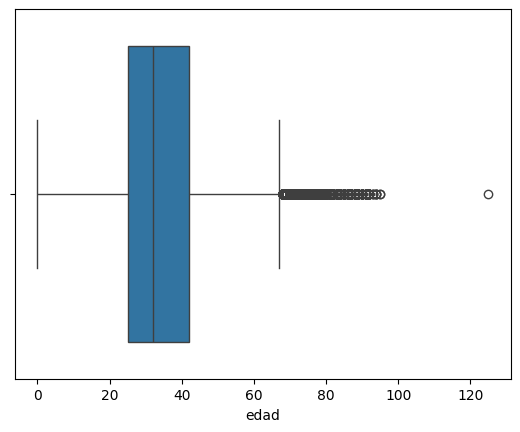

In [805]:
sns.boxplot( x = df.edad ) ;

In [806]:
mean_edad = np.mean(df.edad)
sd_edad= np.std(df.edad)
[edad for edad in df.edad if (edad < mean_edad-5*sd_edad) or (edad > mean_edad + 5*sd_edad)]

[125.0]

In [807]:
# Eliminar valores tipicos en relacion  a la edad
df = df[~((df.edad < (mean_edad - 4 * sd_edad)) | (df.edad > (mean_edad + 5 * sd_edad)))]

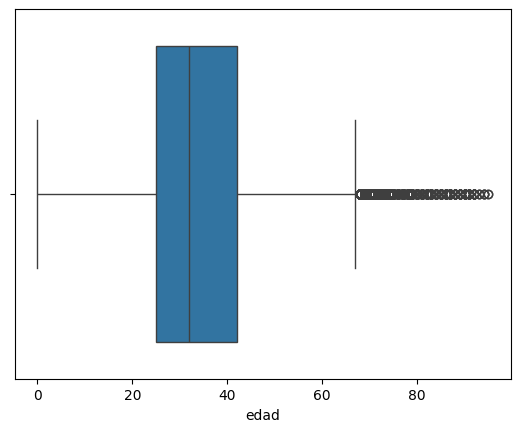

In [808]:
sns.boxplot( x = df.edad ) ;

#### **Valores atipicos en categorias**

In [809]:
df['movil_victima'].value_counts()

movil_victima
A pie                  85722
Motocicleta             5549
Vehículo Privado        3815
Bus                     2157
Taxi                    1124
Bicicleta                560
Metro                    120
No Disponible             12
Transporte Aéreo           3
Transporte Marítimo        1
Name: count, dtype: int64

Se eliminan por ser valores atípicos con baja frecuencia y poca relevancia operativa en delitos urbanos:

- No Disponible	12
- Transporte Aéreo	3
- Transporte Marítimo	1

In [810]:
# Eliminar fila con categorias "movil_victima" poco frecuentes.
df = df[~df["movil_victima"].isin(["No Disponible", "Transporte Aéreo", "Transporte Marítimo"])]

In [811]:
df['movil_agresor'].value_counts()

movil_agresor
A pie                  75890
Motocicleta            18119
Vehículo Privado        2000
Bus                     1705
Taxi                     967
Bicicleta                267
Metro                     96
Transporte Marítimo        1
Transporte Aéreo           1
Name: count, dtype: int64

In [812]:
# Eliminar fila con categorias "movil_agresor" poco frecuentes.
df = df[~df['movil_agresor'].isin(['Transporte Marítimo','Transporte Aéreo'])]

In [813]:
df['movil_agresor'].value_counts()

movil_agresor
A pie               75890
Motocicleta         18119
Vehículo Privado     2000
Bus                  1705
Taxi                  967
Bicicleta             267
Metro                  96
Name: count, dtype: int64

### **Nuevas  columnas**

**Columna con categoria delito.**

Se crea una clasificación de delitos  para mejorar la toma de decisiones policiales, facilitando el análisis y patrullaje en función del tipo de crimen predominante en cada zona.

No se considera la tipologia ya que es generica, agrupa delitos muy diferentes en la misma categoria.

Beneficio final:

Genera clusters más interpretables y accionables para

*   Genera clusters más interpretables y accionables para la policía.
*   Permite asignar recursos según el tipo de criminalidad predominante en cada zona.

* Facilita la visualización en mapas para mejorar el patrullaje y la prevención.

* Con esta clasificación, la policía puede tomar decisiones más rápidas y efectivas basadas en datos.

In [814]:
# Diccionario con la clasificación mejorada de delitos
delitos_categorias = {

    # 🟠 Robos y Hurtos (requieren patrullaje intensivo en calles, comercios y viviendas)
    # Separa hurtos comunes de delitos más graves como extorsión.
    'HURTO PERSONAS': 'Robos y Hurtos',
    'HURTO RESIDENCIAS': 'Robos y Hurtos',
    'HURTO MOTOCICLETAS': 'Robos y Hurtos',
    'HURTO AUTOMOTORES': 'Robos y Hurtos',
    'HURTO ENTIDADES COMERCIALES': 'Robos y Hurtos',
    'ABIGEATO': 'Robos y Hurtos',  # Robo de ganado, similar a hurto,
    'DAÑO EN BIEN AJENO': 'Robos y Hurtos',

    # 🟢 Violencia Familiar (requiere protección de víctimas y prevención)
    'VIOLENCIA INTRAFAMILIAR': 'Violencia Familiar',

    # 🟡 Delitos Sexuales (requieren intervención especializada y atención a víctimas)
    # Facilita la persecución de agresores y la protección de víctimas.
    'ACTOS SEXUALES CON MENOR DE 14 AÑOS': 'Delitos Sexuales',
    'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS': 'Delitos Sexuales',
    'ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR': 'Delitos Sexuales',
    'ACCESO CARNAL VIOLENTO': 'Delitos Sexuales',
    'ACOSO SEXUAL': 'Delitos Sexuales',
    'ACTO SEXUAL VIOLENTO': 'Delitos Sexuales',
    'PORNOGRAFÍA CON MENORES': 'Delitos Sexuales',
    'PROXENETISMO CON MENOR DE EDAD': 'Delitos Sexuales',
    'UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PARA OFRECER SERVICIOS SEXUALES DE MENORES': 'Delitos Sexuales',
    'INDUCCIÓN A LA PROSTITUCIÓN': 'Delitos Sexuales',
    'CONSTREÑIMIENTO A LA PROSTITUCIÓN': 'Delitos Sexuales',
    'DEMANDA DE EXPLOTACION SEXUAL COMERCIAL DE PERSONA MENOR DE 18 AÑOS DE EDAD': 'Delitos Sexuales',
    'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR (CIRCUNSTANC)': 'Delitos Sexuales',
    'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR': 'Delitos Sexuales',
    'ESTÍMULO A LA PROSTITUCIÓN DE MENORES': 'Delitos Sexuales',
    'ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS DE AGRAVACIÓN)': 'Delitos Sexuales',
    'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS AGRAVACIÓN)': 'Delitos Sexuales',
    'ACCESO CARNAL VIOLENTO (CIRCUNSTANCIAS AGRAVACIÓN)': 'Delitos Sexuales',
    'ACTO SEXUAL VIOLENTO (CIRCUNSTANCIAS DE AGRAVACIÓN)': 'Delitos Sexuales',
    'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR  (CIRCUNSTANC': 'Delitos Sexuales',
    'ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR (CIRCUNSTANCIAS AGRAVACIÓN)': 'Delitos Sexuales',


    # 🔵 Crimen Organizado (Extorsión, amenazas y delitos de alto impacto)
    # Agrupa delitos que requieren inteligencia policial y operativos tácticos.
    'EXTORSIÓN': 'Crimen Organizado',
    'TERRORISMO': 'Crimen Organizado',
    'AMENAZAS': 'Crimen Organizado',
    'INCENDIO': 'Crimen Organizado',

    # 🔴 Delitos Violentos (requieren patrullaje táctico y operativos de alto impacto)
    # Permite focalizar patrullaje en zonas de alta violencia letal.
    'HOMICIDIO': 'Delitos Violentos',
    'FEMINICIDIO': 'Delitos Violentos',
    'LESIONES PERSONALES': 'Delitos Violentos',
    'LESIONES CULPOSAS': 'Delitos Violentos',
    'HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)': 'Delitos Violentos',
    'VIOLENCIA CONTRA SERVIDOR PÚBLICO': 'Delitos Violentos',
    'LESIONES AL FETO': 'Delitos Violentos',
    'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )': 'Delitos Violentos',
}


In [815]:
# Aplicar la clasificación al DataFrame
df['categoria_delito'] = df['delito_solo'].map(delitos_categorias)

In [816]:
# Verificar si hay delitos sin clasificar
delitos_sin_clasificar = df[df['categoria_delito'].isna()]['delito_solo'].unique()

# Imprimir los delitos no clasificados (si hay)
if len(delitos_sin_clasificar) > 0:
    print("❌ Delitos sin clasificar, revisar:")
    for delito in delitos_sin_clasificar:
        print("-", delito)
else:
    print("✅ Todos los delitos han sido clasificados correctamente.")


✅ Todos los delitos han sido clasificados correctamente.


In [817]:
df['categoria_delito'].value_counts()

categoria_delito
Robos y Hurtos        60753
Delitos Violentos     17091
Violencia Familiar    13422
Crimen Organizado      4422
Delitos Sexuales       3357
Name: count, dtype: int64

In [818]:
df['tipologia'].value_counts()

tipologia
DELITOS CONTRA EL PATRIMONIO ECONOMICO                         61250
DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL                17091
DELITOS CONTRA LA FAMILIA                                      13422
DELITOS CONTRA LA SEGURIDAD PUBLICA                             3925
DELITOS CONTRA LA LIBERTAD, INTEGRIDAD Y FORMACION SEXUALES     3357
Name: count, dtype: int64

In [819]:
# Agrupar los delitos según la tipología y contar su frecuencia en el dataset
df_grouped = df.groupby(['categoria_delito', 'delito_solo'])['nom_com'].count().reset_index()

# Mostrar los delitos organizados dentro de cada tipología
for tipologia in df_grouped['categoria_delito'].unique():
    print(f"\n🟢 {tipologia.upper()}")  # Encabezado de la categoría
    delitos = df_grouped[df_grouped['categoria_delito'] == tipologia]['delito_solo'].unique()
    for delito in delitos:
        print(f"- {delito}")  # Imprime cada delito dentro de su tipología



🟢 CRIMEN ORGANIZADO
- AMENAZAS
- EXTORSIÓN
- INCENDIO
- TERRORISMO

🟢 DELITOS SEXUALES
- ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS
- ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS AGRAVACIÓN)
- ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR
- ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR (CIRCUNSTANCIAS AGRAVACIÓN)
- ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR
- ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR  (CIRCUNSTANC
- ACCESO CARNAL VIOLENTO
- ACCESO CARNAL VIOLENTO (CIRCUNSTANCIAS AGRAVACIÓN)
- ACOSO SEXUAL
- ACTO SEXUAL VIOLENTO
- ACTO SEXUAL VIOLENTO (CIRCUNSTANCIAS DE AGRAVACIÓN)
- ACTOS SEXUALES CON MENOR DE 14 AÑOS
- ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS DE AGRAVACIÓN)
- CONSTREÑIMIENTO A LA PROSTITUCIÓN
- DEMANDA DE EXPLOTACION SEXUAL COMERCIAL DE PERSONA MENOR DE 18 AÑOS DE EDAD
- ESTÍMULO A LA PROSTITUCIÓN DE MENORES
- INDUCCIÓN A LA PROSTITUCIÓN
- PORNOGRAFÍA CON



---



**Columna nueva rango horario**

Se creara categorias mas legibles para  el rango horario

In [820]:
# Cual es el formato de la hora?
df.rango_horario.unique().tolist()[:3]

['20:00-20:59', '1:00-1:59', '5:00-5:59']

In [821]:
# Función para asignar el momento del día de forma automatizada
def asignar_momento(hora):
    # Extraemos la hora de inicio del rango de horas
    hora_inicio = int(hora.split('-')[0].split(':')[0])

    # Definir los rangos de momentos del día
    if 0 <= hora_inicio < 6:
        return 'Madrugada'
    elif 6 <= hora_inicio < 12:
        return 'Mañana'
    elif 12 <= hora_inicio < 18:
        return 'Tarde'
    elif 18 <= hora_inicio < 24:  # Asegura que solo valores válidos sean categorizados
      return 'Noche'
    else:
        return 'Hora no válida'

In [822]:
# Aplicar la función para asignar el momento del día
df['momento_del_dia'] = df['rango_horario'].map(lambda x: asignar_momento(x))

In [823]:
df['momento_del_dia'].value_counts()

momento_del_dia
Mañana       30281
Tarde        27687
Noche        26599
Madrugada    14478
Name: count, dtype: int64

Se crean una nueva columna para armas_medios creando categorias superiores. La agrupación prioriza la respuesta policial según el nivel de riesgo: "Violencia Letal" requiere intervención inmediata, "Violencia No Letal" prevención de daños, "Robo y Acceso Forzado" patrullaje preventivo y "Otros" análisis adicional. Esto optimiza la distribución de recursos y la seguridad ciudadana.

In [824]:
# Diccionario de mapeo de "armas_medios" a "Tipo de Amenaza"
WEAPON_THREAT_DICT  = {
    # Alta prioridad: Riesgo letal, requiere respuesta inmediata
    "ARMA DE FUEGO": "Violencia Letal",
    "ARMA TRAUMATICA": "Violencia Letal",
    "GRANADA DE MANO": "Violencia Letal",
    "PAQUETE BOMBA": "Violencia Letal",
    "ARTEFACTO EXPLOSIVO/CARGA DINAMITA": "Violencia Letal",
    "PAPA EXPLOSIVA": "Violencia Letal",
    "ARMA BLANCA / CORTOPUNZANTE": "Violencia Letal",
    "CORTANTES": "Violencia Letal",
    "PUNZANTES": "Violencia Letal",
    "CONTUNDENTES": "Violencia Letal",
    "CORTOPUNZANTES": "Violencia Letal",

    # Prioridad media: Puede causar daño, pero con menor letalidad
    "ESCOPOLAMINA": "Violencia No Letal",
    "ACIDO": "Violencia No Letal",
    "VENENO": "Violencia No Letal",
    "QUIMICOS": "Violencia No Letal",
    "GASES": "Violencia No Letal",
    "LICOR ADULTERADO": "Violencia No Letal",
    "AGUA CALIENTE": "Violencia No Letal",
    "MEDICAMENTOS": "Violencia No Letal",
    "CUERDA/SOGA/CADENA": "Violencia No Letal",
    "PERRO": "Violencia No Letal",
    "JERINGA": "Violencia No Letal",
    "SUSTANCIAS TOXICAS": "Violencia No Letal",

    # Prevención: Robo y acceso no autorizado
    "LLAVE MAESTRA": "Robo y Acceso Forzado",
    "PALANCAS": "Robo y Acceso Forzado",
    "CARTA EXTORSIVA": "Robo y Acceso Forzado",
    "LLAMADA TELEFONICA": "Robo y Acceso Forzado",
    "REDES SOCIALES": "Robo y Acceso Forzado",
    "VEHICULO": "Robo y Acceso Forzado",
    "MOTO": "Robo y Acceso Forzado",
    "BICICLETA": "Robo y Acceso Forzado",

    # Incendios y explosivos: Pueden causar daños materiales y humanos
    "ARTEFACTO INCENDIARIO": "Incendios y Explosivos",
    "COMBUSTIBLE": "Incendios y Explosivos",
    "ARTEFACTO EXPLOSIVO/CARGA DINAMITA": "Incendios y Explosivos",
    "PAPA EXPLOSIVA": "Incendios y Explosivos",
    "GRANADA DE MANO": "Incendios y Explosivos",
    "PAQUETE BOMBA": "Incendios y Explosivos",

    # Casos sin empleo de armas o sin información clara
    "SIN EMPLEO DE ARMAS": "Sin Empleo de Armas",
    "NO DISPONIBLE": "Sin Empleo de Armas",
    "NO REPORTADO": "Sin Empleo de Armas",
    "DIRECTA": "Sin Empleo de Armas",
    "MIXTA": "Sin Empleo de Armas",
    "PRENDAS DE VESTIR": "Sin Empleo de Armas",
    "BOLSA PLASTICA": "Sin Empleo de Armas"
}


In [825]:
df['tipo_amenaza'] = df['armas_medios'].map(WEAPON_THREAT_DICT).fillna("Otros y Sin Información")

In [826]:
df['tipo_amenaza'].value_counts()

tipo_amenaza
Violencia Letal           46821
Sin Empleo de Armas       46225
Robo y Acceso Forzado      5375
Violencia No Letal          596
Incendios y Explosivos       28
Name: count, dtype: int64

- **Violencia Letal (46,836 casos):** Prioridad máxima, requiere respuesta inmediata para reducir homicidios y ataques con armas peligrosas.

- **Sin Empleo de Armas (46,251 casos):** Casos con menor riesgo físico, pero útiles para estrategias de prevención y patrullaje.

- **Robo y Acceso Forzado (5,377 casos):** Permite focalizar operativos contra robos y mejorar la seguridad en zonas vulnerables.

- **Violencia No Letal (594 casos):** Aunque no es mortal, requiere atención para evitar daños graves o escalamiento de violencia.

- **Incendios y Explosivos (30 casos):** Amenazas con alto impacto destructivo, clave para prevención y respuesta especializada.



---



### **Nuevas columnas de geojson**

In [827]:
gdf['densidad_poblacional'] = np.round( gdf['personas_s'] / gdf['area']  , 4)

### **Borrar filas**

In [828]:
df['movil_victima'].value_counts()

movil_victima
A pie               85720
Motocicleta          5549
Vehículo Privado     3815
Bus                  2157
Taxi                 1124
Bicicleta             560
Metro                 120
Name: count, dtype: int64

### Nuevas columnas df poblacion

In [829]:
# Separar número y texto directamente con str.extract
df_poblacion.loc[:,'cod_comuna'] = df_poblacion['Comunas_poligonos'].str.extract(r'(\d+)')
df_poblacion.loc[:,'Comunas_poligonos'] = df_poblacion['Comunas_poligonos'].str.replace(r'^\d+\. ', '', regex=True).str.strip()

# Convertir Comuna_id a enteros para que el merge con tabla de hechos no falle
df_poblacion['cod_comuna'] = pd.to_numeric(df_poblacion['cod_comuna'], errors='coerce')

df_poblacion

,ORDEN,AÑO,Barrio_poligono,categoria,Comunas_poligonos,manzanas,personas,hombres,mujeres,Edad de 0 a 9,Edad de 10 a 19,Edad de 20 a 29,Edad de 30 a 39,Edad de 40 a 49,Edad de 50 a 59,Edad de 60 a 69,Edad de 70 a 79,Edad de 80 a 89,cod_comuna
0,1,2021,13 DE JUNIO,BARRIO,NORORIENTAL,5,410,200,209,65,51,78,62,60,47,34,8,4,2
1,2,2021,ALTOS DEL KENNEDY,BARRIO,NORTE,6,529,249,279,76,85,106,71,60,71,34,19,4,1
2,3,2021,ALTOS DEL PROGRESO,BARRIO,NORTE,17,1187,605,582,221,204,236,179,145,118,48,26,6,1
3,4,2021,BALCONES DEL KENNEDY,BARRIO,NORTE,18,1334,659,675,250,222,248,204,190,111,68,31,7,1
4,5,2021,BETANIA,BARRIO,NORTE,17,1664,841,823,222,218,355,248,211,246,117,28,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,259,2021,VILLA DEL NOGAL,A. RURAL,SUR,857,524,543,209,199,192,146,142,83,41,34,12,246,11
259,260,2021,PRADOS DEL MUTIS,BARRIO,LAGOS DEL CACIQUE,2,1670,788,881,165,218,277,234,224,284,174,64,25,16
260,261,2021,QUEBRADA LA IGLESIA I,BARRIO,MUTIS,9,151,83,69,29,12,33,15,26,22,10,0,3,17
261,262,2021,VEREDA VIJAGUAL,A. RURAL,CORREG. 1,126,84,73,27,26,31,22,25,9,7,5,3,32,1


## **Borrar  columnas**

In [830]:
# columna a borrar tabla de hechos(crimenes)

columnas_a_borrar = ['descripcion_conducta' ,
                     'armas_medios' ,
                     'barrios_hecho',
                     'edad',
                     'clase_sitio',
                     'articulo',
                     'delito_solo',
                     'rango_horario',
                     'rango_horario_orden',
                     'cantidad_unica',
                     'tipologia',
                     'localidad'
                     ]
df.drop( columnas_a_borrar , axis=1, inplace=  True)

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99045 entries, 0 to 100991
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_hecho       99045 non-null  datetime64[ns]
 1   hora_hecho        99045 non-null  object        
 2   sexo              99045 non-null  object        
 3   movil_victima     99045 non-null  object        
 4   movil_agresor     99044 non-null  object        
 5   curso_vida        99045 non-null  category      
 6   curso_vida_orden  99045 non-null  int8          
 7   year              99045 non-null  int64         
 8   mes_num           99045 non-null  int64         
 9   dia_num           99045 non-null  int64         
 10  dia_nombre        99045 non-null  object        
 11  dia_nombre_orden  99045 non-null  int64         
 12  num_com           99045 non-null  int64         
 13  nom_com           99045 non-null  object        
 14  categoria_delito  99045 no

##  **Borrar columnas tabla geojson**

In [832]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   area                          17 non-null     float64 
 1   organicos__kg_semana_         17 non-null     float64 
 2   personas_s                    17 non-null     int32   
 3   nombre_cod                    17 non-null     object  
 4   habitantes                    17 non-null     int32   
 5   aprovechables__kg_semana_     17 non-null     float64 
 6   no_aprovechables__kg_semana_  17 non-null     float64 
 7   rcd__kg_semana_               17 non-null     float64 
 8   generacion__kg_semana_        17 non-null     float64 
 9   nombre_com                    17 non-null     object  
 10  posconsumo__kg_semana_        17 non-null     float64 
 11  objectid_1                    17 non-null     int32   
 12  cod_munici                    17 non-null   

In [833]:
# columna a borrar tabla geojson

columnas_a_mantener = ['area',
                       'nombre_com',
                       'cod_comuna' ,
                       'geometry',

                     ]
gdf = gdf[columnas_a_mantener]

In [834]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   area        17 non-null     float64 
 1   nombre_com  17 non-null     object  
 2   cod_comuna  17 non-null     int64   
 3   geometry    17 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 676.0+ bytes


##  **Borrar columnas df poblacion**

### Ajustar df poblacion a nivel de comuna

In [835]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORDEN              263 non-null    int64 
 1   AÑO                263 non-null    int64 
 2   Barrio_poligono    263 non-null    object
 3   categoria          263 non-null    object
 4   Comunas_poligonos  263 non-null    object
 5   manzanas           263 non-null    int64 
 6   personas           263 non-null    int64 
 7   hombres            263 non-null    int64 
 8   mujeres            263 non-null    int64 
 9   Edad de 0 a 9      263 non-null    int64 
 10  Edad de 10 a 19    263 non-null    int64 
 11  Edad de 20 a 29    263 non-null    int64 
 12  Edad de 30 a 39    263 non-null    int64 
 13  Edad de 40 a 49    263 non-null    int64 
 14  Edad de 50 a 59    263 non-null    int64 
 15  Edad de 60 a 69    263 non-null    int64 
 16  Edad de 70 a 79    263 non-null    int64 
 1

In [836]:
df_poblacion = (df_poblacion [~df_poblacion ["Comunas_poligonos"]
                  .isin(['CORREG. 1', 'CORREG. 2', 'CORREG. 3'])]
               )

df_poblacion

,ORDEN,AÑO,Barrio_poligono,categoria,Comunas_poligonos,manzanas,personas,hombres,mujeres,Edad de 0 a 9,Edad de 10 a 19,Edad de 20 a 29,Edad de 30 a 39,Edad de 40 a 49,Edad de 50 a 59,Edad de 60 a 69,Edad de 70 a 79,Edad de 80 a 89,cod_comuna
0,1,2021,13 DE JUNIO,BARRIO,NORORIENTAL,5,410,200,209,65,51,78,62,60,47,34,8,4,2
1,2,2021,ALTOS DEL KENNEDY,BARRIO,NORTE,6,529,249,279,76,85,106,71,60,71,34,19,4,1
2,3,2021,ALTOS DEL PROGRESO,BARRIO,NORTE,17,1187,605,582,221,204,236,179,145,118,48,26,6,1
3,4,2021,BALCONES DEL KENNEDY,BARRIO,NORTE,18,1334,659,675,250,222,248,204,190,111,68,31,7,1
4,5,2021,BETANIA,BARRIO,NORTE,17,1664,841,823,222,218,355,248,211,246,117,28,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,2021,MONTERREDONDO,BARRIO,MUTIS,31,5824,2767,3054,873,806,1175,960,734,674,376,164,47,17
257,258,2021,MUTIS,BARRIO,MUTIS,46,9295,4343,4951,967,1202,1569,1280,1187,1387,770,529,336,17
258,259,2021,VILLA DEL NOGAL,A. RURAL,SUR,857,524,543,209,199,192,146,142,83,41,34,12,246,11
259,260,2021,PRADOS DEL MUTIS,BARRIO,LAGOS DEL CACIQUE,2,1670,788,881,165,218,277,234,224,284,174,64,25,16


In [837]:
columnas_a_mantener = ['cod_comuna',
                       #'Comunas_poligonos',
                       'manzanas',
                       'personas'
                     ]
df_poblacion = df_poblacion[columnas_a_mantener]

In [838]:
# Agrupar por comuna cantidades numericas
df_poblacion = df_poblacion.groupby('cod_comuna', as_index=False).sum()

In [839]:
df_poblacion

,cod_comuna,manzanas,personas
0,1,667,72591
1,2,515,32910
2,3,339,51781
3,4,410,37339
4,5,251,38339
5,6,211,29962
6,7,126,30544
7,8,154,18788
8,9,129,16513
9,10,450,56928


In [840]:
# poblacion 2021 bucaramanga sin consdierar corregimientos
df_poblacion.personas.sum()

np.int64(611902)

# 🕹️ **Descargar datasets para App Streamlit**

In [841]:
#df_streamlit = pd.merge(df , gdf ,  left_on = "num_com" , right_on="cod_comuna")

#columnas_a_borrar = [ 'area','personas_s','geometry']
#df_streamlit = df_streamlit.drop(columns=columnas_a_borrar )

# Guardarlo como CSV
#df_streamlit.to_csv('df_streamlit.csv', index=False)

# Descargar el archivo
#files.download('df_streamlit.csv')

In [842]:
#df_streamlit.info()

# Exploración de datos (EDA)





---


---




# Flujo modelos clustering

- **Preprocesamiento de los datos**

Objetivo: Transformar los datos en un  fromato adecuado para alimentar los modelos de machine learningg no supervisados.

      - Preparación de filas ( Granularidad)
      - Preparación de columnas ( Sin valores nulos y numérico).
      - Ingeniería de características  (Nuevas  columnas)
      - Selección de características.
      - Escalar datos (Algoritmos basados en distancia como KMEANS lo requieren).

- **Algoritmo**
  - Reducción de dimensión
  - KMEANS

- **Ajustes**
  - Evaluar y ajustar el modelo usando métricas e intuición.
  - Visualización de datos.
  - Interpretar los resultados


>   Si los resultados no tienen sentido se regresa al preprocesamiento  o al algoritmo.



- **Selección**

Responder a la pregunta de negocio considando
lo consultado acerca de las comunas de Bucaramanga.

---


## Preprocesamiento de los datos

  **1.** Crear una sola tabla.

  **2.** Granularidad.

  **3.** Verificar valores que no hayan valores nulos y
        que cada columna es numerica.
        
  **4.** Ingeniería de características.

### Una sola tabla

In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99045 entries, 0 to 100991
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_hecho       99045 non-null  datetime64[ns]
 1   hora_hecho        99045 non-null  object        
 2   sexo              99045 non-null  object        
 3   movil_victima     99045 non-null  object        
 4   movil_agresor     99044 non-null  object        
 5   curso_vida        99045 non-null  category      
 6   curso_vida_orden  99045 non-null  int8          
 7   year              99045 non-null  int64         
 8   mes_num           99045 non-null  int64         
 9   dia_num           99045 non-null  int64         
 10  dia_nombre        99045 non-null  object        
 11  dia_nombre_orden  99045 non-null  int64         
 12  num_com           99045 non-null  int64         
 13  nom_com           99045 non-null  object        
 14  categoria_delito  99045 no

In [844]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   area        17 non-null     float64 
 1   nombre_com  17 non-null     object  
 2   cod_comuna  17 non-null     int64   
 3   geometry    17 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 676.0+ bytes


---

### Preparando filas (Granularidad)



> El objetivo central del proyecto es crear conjuntos de comunas similares en base a los crímenes y caracteristicas como la poblacion y el area de la comuna. Por tanto las filas deben estar a nivel de comunas agregadas con valores numericos.

**CADA FILA  DEBE SER UNA COMUNA!**

En base a cuales  caracteristicas se creara la tabla pivote?

**A.** Tipología crimen (diferentes categorias)

**B.** Población Comuna

**C.** Area comuna.

In [845]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99045 entries, 0 to 100991
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_hecho       99045 non-null  datetime64[ns]
 1   hora_hecho        99045 non-null  object        
 2   sexo              99045 non-null  object        
 3   movil_victima     99045 non-null  object        
 4   movil_agresor     99044 non-null  object        
 5   curso_vida        99045 non-null  category      
 6   curso_vida_orden  99045 non-null  int8          
 7   year              99045 non-null  int64         
 8   mes_num           99045 non-null  int64         
 9   dia_num           99045 non-null  int64         
 10  dia_nombre        99045 non-null  object        
 11  dia_nombre_orden  99045 non-null  int64         
 12  num_com           99045 non-null  int64         
 13  nom_com           99045 non-null  object        
 14  categoria_delito  99045 no

In [846]:
# Obtener el número de años únicos
num_yars = df['year'].nunique()

In [847]:
def calcular_factor_ajuste(fecha_inicio, fecha_fin):
    """
    Calcula el factor de ajuste temporal para anualizar las tasas de criminalidad.

    Parámetros:
        fecha_inicio (str): Fecha de inicio en formato 'YYYY-MM-DD'.
        fecha_fin (str): Fecha de fin en formato 'YYYY-MM-DD'.

    Retorna:
        float: Factor de ajuste temporal.
    """
    # Convertir las fechas a objetos datetime
    fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
    fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')

    # Calcular la cantidad de días del periodo
    dias_periodo = (fecha_fin - fecha_inicio).days + 1

    # Factor de ajuste (anualización)
    factor_ajuste_tiempo = 365 / dias_periodo

    return round(factor_ajuste_tiempo, 4)

In [848]:

# Filtrar el DataFrame según las fechas seleccionadas
#df_filtrado = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]

num_years = df['fecha_hecho'].dt.year.nunique()
print(f'Años distintos en los datos: {num_years}')

Años distintos en los datos: 8


In [849]:
# Paso 1: Contar la cantidad de cada tipo de crimen por comuna

# Pivotar y calcular el promedio anual por categoría de crimen
df_pivot_sin_datos_demograficos = (df.pivot_table(index='num_com',
                                           columns='categoria_delito',
                                           aggfunc='size', fill_value=0)
                                           / num_years).reset_index()

df_pivot_con_datos_demograficos = df_pivot_sin_datos_demograficos.merge(
                                                   df_poblacion ,
                                                   how='left',
                                                   left_on ='num_com' ,
                                                   right_on = 'cod_comuna' )

df_pivot_con_datos_demograficos = df_pivot_con_datos_demograficos.merge(
                                                   gdf[['cod_comuna','nombre_com', 'area']],
                                                   how='left',
                                                   left_on ='num_com' ,
                                                   right_on = 'cod_comuna' )

df_model  = df_pivot_con_datos_demograficos.drop(columns = ['cod_comuna_x','cod_comuna_y'])
df_model

,num_com,Crimen Organizado,Delitos Sexuales,Delitos Violentos,Robos y Hurtos,Violencia Familiar,manzanas,personas,nombre_com,area
0,1,53.625,68.250,281.375,441.500,319.500,667,72591,Comuna Norte,4.326768e+06
1,2,20.250,31.125,134.625,174.375,149.500,515,32910,Comuna Nororiental,1.371355e+06
2,3,52.375,44.750,216.375,999.500,145.625,339,51781,Comuna San Francisco,2.734584e+06
3,4,40.625,37.000,202.000,382.375,171.500,410,37339,Comuna Occidental,1.378682e+07
4,5,43.000,27.500,178.500,277.000,152.125,251,38339,Comuna Garcia Rovira,5.688166e+06
5,6,23.375,21.500,123.250,629.750,55.250,211,29962,Comuna La Concordia,1.928794e+06
6,7,17.500,9.500,38.750,209.750,35.000,126,30544,Comuna Ciudadela Real de Minas,1.079359e+06
7,8,13.250,11.375,56.000,115.500,46.875,154,18788,Comuna Suroccidente,1.057978e+06
8,9,11.625,8.500,44.875,141.250,34.750,129,16513,Comuna La Pedregosa,8.925716e+05
9,10,22.750,24.250,96.625,406.125,92.000,450,56928,Comuna Provenza,2.631933e+06


In [850]:
# Verificar granularidad
if df_model.shape[0] == df_model['nombre_com'].nunique():
    print("Granularidad correcta :)")
else:
    raise ValueError("Error: La granularidad no es la esperada. Existen registros duplicados :(")

Granularidad correcta :)




---



### **Preparación de columnas**




#### **Valores  no nulos**

Se deben limpiar valores faltantes y deben ser numericas.

> Los valores faltantes ya se manejaron con pivot_table llenando con ceros las comunas sin  un delito determinado.


Comprobación:

In [851]:
# Saber cuales son las filas nulas
df_model[ df_model.isna().any(axis=1) ]

,num_com,Crimen Organizado,Delitos Sexuales,Delitos Violentos,Robos y Hurtos,Violencia Familiar,manzanas,personas,nombre_com,area


In [852]:
# Saber si hay NaN en todo el DataFrame
df_model.isna().any(axis=1).any()

np.False_

#### **Columnas numéricas**

Este paso  normalmente se aborda con variables dummy y reemplazando con la funcion .where , sin embargo como se aplico un pivot_table agregando por conteo de crimenes las columnas de interes ya son numéricas.

Comprobación:

In [853]:
df_model.dtypes

num_com                 int64
Crimen Organizado     float64
Delitos Sexuales      float64
Delitos Violentos     float64
Robos y Hurtos        float64
Violencia Familiar    float64
manzanas                int64
personas                int64
nombre_com             object
area                  float64
dtype: object

### **Ingeniería de características**

Objetivo:  crear columnas que ayuden a mejorar el modelo.  Algunas tecnicas son:

- Columnas calculadas
- Binning values
- Identificar  variables proxy.



#### **Excluir columna identificadora**

Aunque la columna identificado se debe guardar,
el modelo de machine learning  no lo requiere.

> Excluir de la tabla pivoteada las  comunas



In [854]:
identificadores = df_model[['num_com' , 'nombre_com']]
identificadores.head(2)

,num_com,nombre_com
0,1,Comuna Norte
1,2,Comuna Nororiental


In [855]:
# para  el modelo no se requiere los identificadores:
df_model.drop( columns = identificadores.columns.to_list() , inplace=True)

#### Calculadas calculadas

**Columnas calculadas**

A mayor **densidad poblacional** se pueden tener  mayor cantidad de deliutos callejeros, conflictos interpersonales, mas robos,etc.

In [856]:
df.select_dtypes(include='number').columns

Index(['curso_vida_orden', 'year', 'mes_num', 'dia_num', 'dia_nombre_orden',
       'num_com'],
      dtype='object')

In [857]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crimen Organizado   17 non-null     float64
 1   Delitos Sexuales    17 non-null     float64
 2   Delitos Violentos   17 non-null     float64
 3   Robos y Hurtos      17 non-null     float64
 4   Violencia Familiar  17 non-null     float64
 5   manzanas            17 non-null     int64  
 6   personas            17 non-null     int64  
 7   area                17 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.2 KB


In [858]:
# Se calcula la densidad poblacional promedio de cada comuna
df_model['poblacional_km2'] = df_model['personas'] / df_model['area']

df_model["manzanas_km2"] = df_model["manzanas"] / df_model["area"]

#### **Crimenes por cada X habitantes**

In [859]:
# Cálculo de tasas por cada 1000 habitantes
cada_X_habitantes = 1000
crimenes = ['Crimen Organizado', 'Delitos Sexuales',
            'Delitos Violentos', 'Robos y Hurtos', 'Violencia Familiar']

for crimen in crimenes:
    # 1. Calcular tasa por cada 1000 habitantes (se conserva)
    nombre_tasa = crimen.lower().replace(' ', '_') + f'_por_{cada_X_habitantes}hab'
    df_model[nombre_tasa] = ((df_model[crimen] / df_model['personas']) * cada_X_habitantes).round(2)

    # 2. Crear versión log-transformada (se añade como nueva columna)
    nombre_log = nombre_tasa + '_log'
    df_model[nombre_log] = np.log1p(df_model[nombre_tasa])  # log(tasa + 1) para evitar -inf

### **Selección  de características**

Cuáles características son relevantes para el modelo?

Segun la intuición que variables son más relevantes para representar cada comuna/barrio por crimen?

In [860]:
# Considerando la densidad poblacional, la poblacion y el area son  redundantes.
# Columnas que no se consideran
#columnas_a_borrar = ['densidad_poblacional']
#columnas_a_borrar = ['Crimen Organizado', 'Delitos Sexuales', 'Delitos Violentos', 'Robos y Hurtos', 'Violencia Familiar',  'manzanas'	, 'personas'	,'area']
columnas_a_borrar = []
df_model.drop(columns=columnas_a_borrar, inplace=True)


In [861]:
df_model

,Crimen Organizado,Delitos Sexuales,Delitos Violentos,Robos y Hurtos,Violencia Familiar,manzanas,personas,area,poblacional_km2,manzanas_km2,crimen_organizado_por_1000hab,crimen_organizado_por_1000hab_log,delitos_sexuales_por_1000hab,delitos_sexuales_por_1000hab_log,delitos_violentos_por_1000hab,delitos_violentos_por_1000hab_log,robos_y_hurtos_por_1000hab,robos_y_hurtos_por_1000hab_log,violencia_familiar_por_1000hab,violencia_familiar_por_1000hab_log
0,53.625,68.250,281.375,441.500,319.500,667,72591,4.326768e+06,0.016777,0.000154,0.74,0.553885,0.94,0.662688,3.88,1.585145,6.08,1.957274,4.40,1.686399
1,20.250,31.125,134.625,174.375,149.500,515,32910,1.371355e+06,0.023998,0.000376,0.62,0.482426,0.95,0.667829,4.09,1.627278,5.30,1.840550,4.54,1.711995
2,52.375,44.750,216.375,999.500,145.625,339,51781,2.734584e+06,0.018936,0.000124,1.01,0.698135,0.86,0.620576,4.18,1.644805,19.30,3.010621,2.81,1.337629
3,40.625,37.000,202.000,382.375,171.500,410,37339,1.378682e+07,0.002708,0.000030,1.09,0.737164,0.99,0.688135,5.41,1.857859,10.24,2.419479,4.59,1.720979
4,43.000,27.500,178.500,277.000,152.125,251,38339,5.688166e+06,0.006740,0.000044,1.12,0.751416,0.72,0.542324,4.66,1.733424,7.23,2.107786,3.97,1.603420
5,23.375,21.500,123.250,629.750,55.250,211,29962,1.928794e+06,0.015534,0.000109,0.78,0.576613,0.72,0.542324,4.11,1.631199,21.02,3.091951,1.84,1.043804
6,17.500,9.500,38.750,209.750,35.000,126,30544,1.079359e+06,0.028298,0.000117,0.57,0.451076,0.31,0.270027,1.27,0.819780,6.87,2.063058,1.15,0.765468
7,13.250,11.375,56.000,115.500,46.875,154,18788,1.057978e+06,0.017758,0.000146,0.71,0.536493,0.61,0.476234,2.98,1.381282,6.15,1.967112,2.49,1.249902
8,11.625,8.500,44.875,141.250,34.750,129,16513,8.925716e+05,0.018500,0.000145,0.70,0.530628,0.51,0.412110,2.72,1.313724,8.55,2.256541,2.10,1.131402
9,22.750,24.250,96.625,406.125,92.000,450,56928,2.631933e+06,0.021630,0.000171,0.40,0.336472,0.43,0.357674,1.70,0.993252,7.13,2.095561,1.62,0.963174


### **Escalar características**

- **K-Means** usa la distancia entre puntos para crear los clusters, y si las variables tienen escalas muy diferentes, los resultados pueden ser incorrectos.

- Se puede escalar con normalizacion o estandarización.

#### **Normalización**

Se escoge este metodo de escala si no se conoce las distirbuciones de  las columnas o no siguen una distribucion normal.

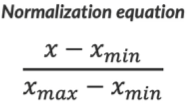

In [862]:
mm_scaler = MinMaxScaler()
normalized = mm_scaler.fit_transform(df_model)
normalized = pd.DataFrame(normalized, columns = df_model.columns)

#### **Estandarización**

- Se elige esta técnica de escala si se conoce que las columnas siguen una distribucion normal.

- Se busca que todas las columnas tengan una media de c ero y una desviacion estandar de uno.

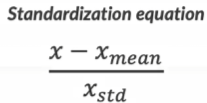

In [863]:
std_scaler = StandardScaler()
standardized = std_scaler.fit_transform(df_model)
standardized  = pd.DataFrame(standardized, columns = df_model.columns)

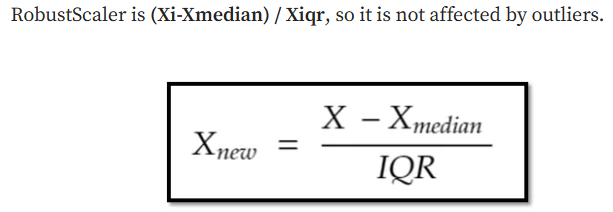

In [864]:
robust_scaler = RobustScaler()
standardized_rob = robust_scaler.fit_transform(df_model)
standardized_rob = pd.DataFrame(standardized, columns = df_model.columns)

#### Normalización vs Estandarización



> Se elige la escala con normalización ya que no se conoce la distribución de las  columnas.

Métodos generales (normalized, standardized, standardized_rob):
Se aplican a variables numéricas en general (por ejemplo, área, número de manzanas, etc.) para llevarlas a una misma escala. Estos métodos se centran en transformar la distribución de los datos, pero no ajustan por el tamaño de la población ni interpretan tasas de incidencia.


In [865]:
#model_df_scaled = normalized
#model_df_scaled = standardized
#model_df_scaled  = standardized_rob


RME (Razón de Morbilidad Estandarizada):
Está diseñada específicamente para datos de eventos, como los crímenes, ya que ajusta el número de casos observados según la población. Esto permite evaluar si hay más o menos casos de los que se esperarían según una tasa global. Aplicar RME a variables que no representan eventos (como área o número de manzanas) carece de sentido, ya que esas variables no tienen una "tasa de incidencia" inherente que deba ajustarse por población.

In [866]:
# -----------------------------------------------------------------------------------------------------------

# La RME está diseñada para normalizar datos de eventos (como crímenes) ajustándolos a la población, 
# # por lo que aplicar RME a otras variables (como área o número de manzanas) no tiene sentido y puede llevar a interpretaciones erróneas.
columnas_eventos = ['Crimen Organizado', 'Delitos Sexuales', 'Delitos Violentos','Robos y Hurtos','Violencia Familiar']
model_df_scaled =  calcular_RME(df_model, columnas_eventos, "personas")

In [867]:
model_df_scaled

,RME_Crimen Organizado,RME_Delitos Sexuales,RME_Delitos Violentos,RME_Robos y Hurtos,RME_Violencia Familiar
0,0.817782,1.371009,1.110215,0.490063,1.605250
1,0.681162,1.379120,1.171662,0.426934,1.656792
2,1.119713,1.260211,1.196854,1.555308,1.025699
3,1.204436,1.444972,1.549505,0.825146,1.675159
4,1.241597,1.045954,1.333527,0.582161,1.447153
5,0.863642,1.046377,1.178204,1.693564,0.672537
6,0.634257,0.453543,0.363371,0.553325,0.417923
7,0.780708,0.882859,0.853713,0.495342,0.909945
8,0.779328,0.750608,0.778364,0.689234,0.767509
9,0.442393,0.621164,0.486147,0.574828,0.589409


In [868]:
df_model

,Crimen Organizado,Delitos Sexuales,Delitos Violentos,Robos y Hurtos,Violencia Familiar,manzanas,personas,area,poblacional_km2,manzanas_km2,...,expected_Crimen Organizado,RME_Crimen Organizado,expected_Delitos Sexuales,RME_Delitos Sexuales,expected_Delitos Violentos,RME_Delitos Violentos,expected_Robos y Hurtos,RME_Robos y Hurtos,expected_Violencia Familiar,RME_Violencia Familiar
0,53.625,68.250,281.375,441.500,319.500,667,72591,4.326768e+06,0.016777,0.000154,...,65.573695,0.817782,49.780845,1.371009,253.441887,1.110215,900.904275,0.490063,199.034405,1.605250
1,20.250,31.125,134.625,174.375,149.500,515,32910,1.371355e+06,0.023998,0.000376,...,29.728621,0.681162,22.568743,1.379120,114.900918,1.171662,408.435752,0.426934,90.234633,1.656792
2,52.375,44.750,216.375,999.500,145.625,339,51781,2.734584e+06,0.018936,0.000124,...,46.775379,1.119713,35.509938,1.260211,180.786521,1.196854,642.637852,1.555308,141.976285,1.025699
3,40.625,37.000,202.000,382.375,171.500,410,37339,1.378682e+07,0.002708,0.000030,...,33.729473,1.204436,25.606025,1.444972,130.364186,1.549505,463.402691,0.825146,102.378334,1.675159
4,43.000,27.500,178.500,277.000,152.125,251,38339,5.688166e+06,0.006740,0.000044,...,34.632804,1.241597,26.291797,1.045954,133.855554,1.333527,475.813379,0.582161,105.120194,1.447153
5,23.375,21.500,123.250,629.750,55.250,211,29962,1.928794e+06,0.015534,0.000109,...,27.065601,0.863642,20.547088,1.046377,104.608365,1.178204,371.849043,1.693564,82.151628,0.672537
6,17.500,9.500,38.750,209.750,35.000,126,30544,1.079359e+06,0.028298,0.000117,...,27.591340,0.634257,20.946207,0.453543,106.640341,0.363371,379.072064,0.553325,83.747391,0.417923
7,13.250,11.375,56.000,115.500,46.875,154,18788,1.057978e+06,0.017758,0.000146,...,16.971781,0.780708,12.884276,0.882859,65.595820,0.853713,233.172012,0.495342,51.514077,0.909945
8,11.625,8.500,44.875,141.250,34.750,129,16513,8.925716e+05,0.018500,0.000145,...,14.916704,0.779328,11.324146,0.750608,57.652958,0.778364,204.937696,0.689234,45.276344,0.767509
9,22.750,24.250,96.625,406.125,92.000,450,56928,2.631933e+06,0.021630,0.000171,...,51.424823,0.442393,39.039604,0.621164,198.756592,0.486147,706.515664,0.574828,156.088642,0.589409


---

## **Clustering**

**Objetivo:** Encontrar grupos de observaciones similares pero diferentes de otras.

- K-Means
- Jerarquico

## **KMEANS**

### **Número de clusters**

- La inercia es una métrica clave para determinar el número óptimo de clusters en un análisis.

- A través del gráfico del "codo", se busca un equilibrio entre una inercia baja (mejor ajuste) y un número razonable de clusters (simplicidad del modelo).

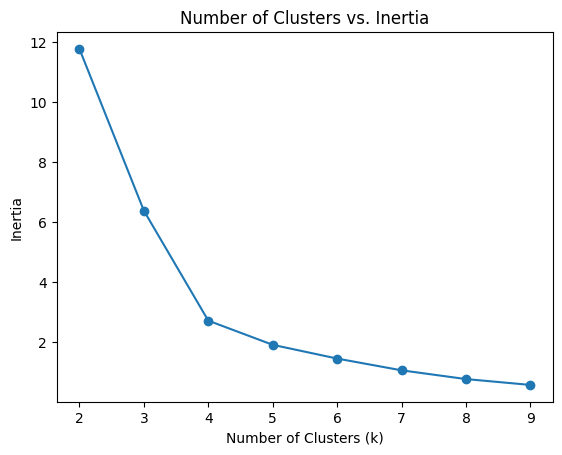

In [869]:
plot_inertia( model_df_scaled)

- El codo se presenta en 4 clusters.



### **Modelo**

In [870]:
# Entrenar el modelo de kmeans
kmeans = KMeans(n_clusters = 4 , n_init = 'auto' , random_state = 42)
kmeans.fit(model_df_scaled)

KMeans(n_clusters=4, random_state=42)

### Interpretación

Los resultados de K-Means se interpretan con los centros de los cluster y la intuición para saber qué significan.

In [871]:
# ver las etiquetas
clusters = pd.Series( kmeans.labels_ , name="cluster" )
clusters

0     2
1     2
2     3
3     2
4     2
5     3
6     0
7     0
8     0
9     0
10    0
11    3
12    3
13    2
14    1
15    0
16    0
Name: cluster, dtype: int32

In [872]:
model_df_scaled.columns.to_list()

['RME_Crimen Organizado',
 'RME_Delitos Sexuales',
 'RME_Delitos Violentos',
 'RME_Robos y Hurtos',
 'RME_Violencia Familiar']

In [873]:
cluster_centers = pd.DataFrame ( kmeans.cluster_centers_ ,
                                columns = model_df_scaled.columns )

cluster_centers

,RME_Crimen Organizado,RME_Delitos Sexuales,RME_Delitos Violentos,RME_Robos y Hurtos,RME_Violencia Familiar
0,0.635309,0.660230,0.578333,0.582969,0.663362
1,14.732974,4.315171,7.357547,9.340410,3.424297
2,0.989351,1.281187,1.238549,0.561009,1.550467
3,0.905127,0.935046,1.017970,1.652767,0.676078


In [874]:
kmeans.cluster_centers_

array([[ 0.63530865,  0.66022991,  0.57833284,  0.58296919,  0.66336205],
       [14.73297354,  4.31517099,  7.35754683,  9.3404104 ,  3.42429659],
       [ 0.9893513 ,  1.28118705,  1.23854861,  0.56100939,  1.55046686],
       [ 0.90512707,  0.93504583,  1.01797045,  1.65276682,  0.67607802]])

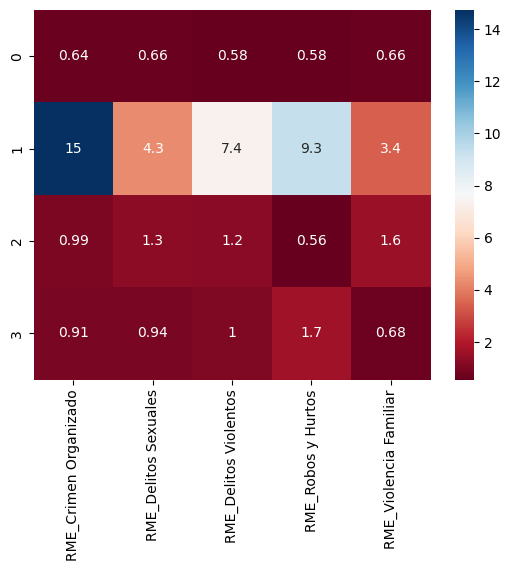

In [875]:
sns.heatmap( cluster_centers , cmap='RdBu', annot = True) ;

In [876]:
from sklearn.metrics import silhouette_score
silhouette= np.round( silhouette_score(model_df_scaled, kmeans.labels_) , 3)
#silhouette_std = silhouette_score(datos_estandarizados, kmeans_std.labels_)

print(f"Silueta con Normalización: {silhouette}")
#print(f"Silueta con Estandarización: {silhouette_std}")


Silueta con Normalización: 0.479


### **Ajustar modelo KMEANS**

Volver a preprocesamiento de datos para:

- Limpieza: Remover valoresa atípicos.
- Nuevas características.
- Seleccion de caractericas mas relevantes.
- Escalar datos si no se ha hecho.


Volver a modelo para:
- Intentar con un  número diferente de cluster si cada vez que se corrre el modelo los cluster son diferentes. Esto puede suceder ya que kmeans  asigne d manera aleatoria los centroides en la primera iteracción.

- Probar otros modelos de clustering como  el Jerarquico.


### **Seleccionar mejor modelo**

Seleccionar el modelo que tenga mas sentido al atrapar patrones que ayuden a resolver el problema de negocio.

En clustering la guia  no es unicamente metricas(inercia, silueta) , también es crucial la experticia en el área.

> Mejor modelo ==>> Experticia en el área > Metricas

Es decir, puede que el gráfico de codo inidque que lo mejor son 4 clusters, pero si con 3 clusters se dan mejores sugerencias de negocio se elige 3 :)





In [877]:
df_pivot_with_clusters = pd.concat( [identificadores , df_model , clusters ] , axis=1 )
df_pivot_with_clusters.head(2)

,num_com,nombre_com,Crimen Organizado,Delitos Sexuales,Delitos Violentos,Robos y Hurtos,Violencia Familiar,manzanas,personas,area,...,RME_Crimen Organizado,expected_Delitos Sexuales,RME_Delitos Sexuales,expected_Delitos Violentos,RME_Delitos Violentos,expected_Robos y Hurtos,RME_Robos y Hurtos,expected_Violencia Familiar,RME_Violencia Familiar,cluster
0,1,Comuna Norte,53.625,68.250,281.375,441.500,319.5,667,72591,4326768.342,...,0.817782,49.780845,1.371009,253.441887,1.110215,900.904275,0.490063,199.034405,1.605250,2
1,2,Comuna Nororiental,20.250,31.125,134.625,174.375,149.5,515,32910,1371355.042,...,0.681162,22.568743,1.379120,114.900918,1.171662,408.435752,0.426934,90.234633,1.656792,2


### Preparar geojson con propiedades

In [878]:
df_pivot_with_clusters

,num_com,nombre_com,Crimen Organizado,Delitos Sexuales,Delitos Violentos,Robos y Hurtos,Violencia Familiar,manzanas,personas,area,...,RME_Crimen Organizado,expected_Delitos Sexuales,RME_Delitos Sexuales,expected_Delitos Violentos,RME_Delitos Violentos,expected_Robos y Hurtos,RME_Robos y Hurtos,expected_Violencia Familiar,RME_Violencia Familiar,cluster
0,1,Comuna Norte,53.625,68.250,281.375,441.500,319.500,667,72591,4.326768e+06,...,0.817782,49.780845,1.371009,253.441887,1.110215,900.904275,0.490063,199.034405,1.605250,2
1,2,Comuna Nororiental,20.250,31.125,134.625,174.375,149.500,515,32910,1.371355e+06,...,0.681162,22.568743,1.379120,114.900918,1.171662,408.435752,0.426934,90.234633,1.656792,2
2,3,Comuna San Francisco,52.375,44.750,216.375,999.500,145.625,339,51781,2.734584e+06,...,1.119713,35.509938,1.260211,180.786521,1.196854,642.637852,1.555308,141.976285,1.025699,3
3,4,Comuna Occidental,40.625,37.000,202.000,382.375,171.500,410,37339,1.378682e+07,...,1.204436,25.606025,1.444972,130.364186,1.549505,463.402691,0.825146,102.378334,1.675159,2
4,5,Comuna Garcia Rovira,43.000,27.500,178.500,277.000,152.125,251,38339,5.688166e+06,...,1.241597,26.291797,1.045954,133.855554,1.333527,475.813379,0.582161,105.120194,1.447153,2
5,6,Comuna La Concordia,23.375,21.500,123.250,629.750,55.250,211,29962,1.928794e+06,...,0.863642,20.547088,1.046377,104.608365,1.178204,371.849043,1.693564,82.151628,0.672537,3
6,7,Comuna Ciudadela Real de Minas,17.500,9.500,38.750,209.750,35.000,126,30544,1.079359e+06,...,0.634257,20.946207,0.453543,106.640341,0.363371,379.072064,0.553325,83.747391,0.417923,0
7,8,Comuna Suroccidente,13.250,11.375,56.000,115.500,46.875,154,18788,1.057978e+06,...,0.780708,12.884276,0.882859,65.595820,0.853713,233.172012,0.495342,51.514077,0.909945,0
8,9,Comuna La Pedregosa,11.625,8.500,44.875,141.250,34.750,129,16513,8.925716e+05,...,0.779328,11.324146,0.750608,57.652958,0.778364,204.937696,0.689234,45.276344,0.767509,0
9,10,Comuna Provenza,22.750,24.250,96.625,406.125,92.000,450,56928,2.631933e+06,...,0.442393,39.039604,0.621164,198.756592,0.486147,706.515664,0.574828,156.088642,0.589409,0


In [879]:
df_pivot_clusters_and_geo = ( df_pivot_with_clusters.merge(gdf[['cod_comuna','geometry']], how="left",
                             left_on = "num_com",
                             right_on = "cod_comuna")
                             .drop(columns=["cod_comuna"])
                              )


# Asegurar que el DataFrame es un GeoDataFrame
gdf_final = gpd.GeoDataFrame(df_pivot_clusters_and_geo, geometry="geometry") # es una tabla aun

# Convertir a GeoJSON
geojson_data = gdf_final.to_json() # es una cadena de GeeoDatFrame, es decir, un GeoJSON

### Mapa de comunas por tipo  de crimenes


In [880]:
import folium
from folium import Figure
from folium.plugins import Fullscreen
from IPython.display import display


# 2. Crear figura y mapa centrado en Bucaramanga, Colombia
fig = Figure(width=360, height=400)
mapa = folium.Map(location=[7.1254, -73.1198],
                  zoom_start=12,
                  tiles="CartoDB positron",  # Tipo de mapa (tema visual)
                  attr="Map tiles by CartoDB") # Atribución del mapa

# Agregar el mapa dentro de la figura para controlar su tamaño
fig.add_child(mapa)

# 3. Definir la paleta de colores para los clusters
palette = {
    0: "#1f77b4",  # azul
    1: "#ff7f0e",  # naranja
    2: "#2ca02c",  # verde
    3: "#d62728",  # rojo
    4: "#9467bd",  # púrpura
    5: "#8c564b",  # marrón
    6: "#e377c2",  # rosa
    7: "#7f7f7f",  # gris
    8: "#bcbd22",  # oliva
    9: "#17becf"   # cian
}

# 4. Definir la función de estilo para el GeoJson
def style_function(feature):
    cluster = feature["properties"].get("cluster")
    return {
        "fillColor": palette.get(cluster, "gray"),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.6,
    }

# 5. Configurar el tooltip (informacion emergente al pasar el cursor)
tooltip = folium.GeoJsonTooltip(
    fields = ["nombre_com", "cluster"], # que atos se msotraran del GeoJSON
    aliases=["Comuna:", "Cluster:"]     # titulos personalizados
)

# 6. Agregar la capa GeoJson al mapa

folium.GeoJson(
    geojson_data,         # 📍 Datos en formato GeoJSON (diccionario o archivo)
    name = "Comunas de Bucaramanga",  # 🏷️ Nombre de la capa (opcional)
    style_function = style_function,  # 🎨 Función para personalizar estilos
    tooltip = tooltip,  # ℹ️ Información emergente al pasar el cursor
    popup = None,    # 📌 Información emergente al hacer clic
    highlight_function = None,  # ✨ Efecto visual al pasar el cursor
).add_to(mapa)  # Agregar la capa al mapa


# 7. Agregar botón de pantalla completa
Fullscreen(position="topright").add_to(mapa)

# Obtener los clusters únicos (ordenados)
clusters = sorted(df_pivot_clusters_and_geo["cluster"].unique())

# Generar la leyenda de forma dinámica
legend_html = """
<div style="
    position: fixed;
    top: 10px; right: 10px;
    background-color: rgba(255, 255, 255, 0.8);
    border: 2px solid grey;
    z-index: 9999;
    font-size: 14px;
    padding: 10px;">
  <b>Clusters</b><br>
"""

# Recorrer cada cluster y agregar una línea a la leyenda
for cluster in clusters:
    color = palette.get(cluster, "gray")
    legend_html += f'<i style="background: {color}; width: 12px; height: 12px; display: inline-block; margin-right: 8px;"></i>Cluster {cluster}<br>'

legend_html += "</div>"

# Agregar la leyenda al mapa
mapa.get_root().html.add_child(folium.Element(legend_html))

# 9. Mostrar el mapa
display(fig)


----